## Business Understanding
New York City TLC adalah singkatan dari "New York City Taxi and Limousine Commission" atau Komisi Taksi dan Limusin New York City. New York City TLC merupakan badan pemerintah yang bertanggung jawab atas regulasi dan lisensi taksi, mobil limusin, dan kendaraan sewa di New York City. Peran utama dari New York City TLC adalah mengatur operasi dan pelayanan transportasi umum yang dilakukan oleh taksi dan kendaraan sewa di wilayah New York City.<br>
New York City TLC memastikan bahwa layanan transportasi umum di kota tersebut berjalan dengan baik, memiliki jumlah perjalanan yang stabil dan sesuai dengan peraturan yang berlaku. New York City TLC berfungsi untuk menjaga standar keselamatan, kualitas pelayanan, dan perlindungan konsumen dalam industri taksi dan limusin di New York City.
### Stakeholder:
- Manajer Operasional New York TLC
### Business Task :
Salah satu tugas dari New York City TLC adalah menjamin dan memastikan jumlah perjalanan taksi tetap stabil. Maka analisis ini dilakukan dengan tujuan untuk menyimpulkan kondisi perjalanan taksi di New York dan menganalisis masalah yang terjadi serta memberikan rekomendasi. Beberapa hal yang perlu dianalisis adalah bagaimana trend perjalanan, jumlah perjalanan, preferensi pelanggan, masalah yang terjadi dan solusi dari dataset yang diberikan.
### Business Problem:
1. Menganalisis bagaimana trend perjalanan dibulan Januari 2023
2. Menganalisis rentang waktu apa suatu perjalanan ramai dan di waktu apa perjalan sepi?
3. Apa penyebab di waktu itu ramai dan kenapa diwaktu yang lain sepi?
4. Menganalisis perilaku pelanggan berdasarkan perjalanan taksi di New York.
5. Menganalisis Solusi dari masalah yang ada
6. Menyimpulkan Analisis dan memberikan rekomendasi berdasarkan analisis.
### Tahapan Analisis:
1. Data Understanding
2. memeriksa bentuk dan informasi tipe kolom
3. Handling misising value
4. Handling data duplikat
5. Handling outlier
6. Analisis dan Visualisasi Data
7. Rekomendasi


## Data Understanding

1. **VendorID**: merupakan kode yang mengindikasikan penyedia LPEP (Long Passenger Endorsement Program) yang memberikan catatan perjalanan.
   - 1 = Creative Mobile Technologies, LLC.
   - 2 = VeriFone Inc.
2. **lpep_pickup_datetime**: merupakan tanggal dan waktu saat meter taksi diaktifkan (mulai perjalanan).

3. **lpep_dropoff_datetime**: merupakan tanggal dan waktu saat meter taksi dinonaktifkan (akhir perjalanan).

4. **store_and_fwd_flag**: merupakan tanda yang menunjukkan apakah catatan perjalanan dipegang dalam memori kendaraan sebelum dikirim ke vendor, yang disebut "store and forward," karena kendaraan tidak memiliki koneksi ke server. Nilainya dapat menjadi 'Y' atau 'N'.
   - Y = perjalanan yang disimpan dan diteruskan
   - N = bukan perjalanan yang disimpan dan diteruskan

5. **RatecodeID**: merupakan kode tarif akhir yang berlaku pada akhir perjalanan.
   - 1 = Tarif standar
   - 2 = JFK (John F. Kennedy International Airport)
   - 3 = Newark (Newark Liberty International Airport)
   - 4 = Nassau atau Westchester
   - 5 = Tarif yang ditawar
   - 6 = Perjalanan kelompok

6. **PULocationID**: merupakan kode zona taksi TLC (Taxi and Limousine Commission) di mana meter taksi diaktifkan.

7. **DOLocationID**: merupakan kode zona taksi TLC di mana meter taksi dinonaktifkan.

8. **passenger_count**: merupakan jumlah penumpang dalam kendaraan. Nilai ini dimasukkan oleh pengemudi.

9. **trip_distance**: merupakan jarak perjalanan yang dilaporkan oleh taksi dalam mil.

10. **fare_amount**: merupakan biaya perjalanan yang dihitung berdasarkan waktu dan jarak yang diukur oleh meter taksi.

11. **extra**: merupakan biaya tambahan dan ekstra seperti biaya puncak atau biaya malam yang saat ini mencakup biaya tambahan $0,50 dan $1.

12. **mta_tax**: merupakan pajak MTA (Metropolitan Transportation Authority) sebesar $0,50 yang secara otomatis diaktifkan berdasarkan tarif yang diukur oleh meter.

13. **tip_amount**: merupakan jumlah tip (tambahan) yang secara otomatis diisi untuk tip kartu kredit. Tips tunai tidak termasuk.

14. **tolls_amount**: merupakan jumlah total tol yang dibayarkan dalam perjalanan.

15. **ehail_fee**: merupakan biaya e-hail (memesan taksi melalui aplikasi ponsel) yang mungkin ada.

16. **improvement_surcharge**: merupakan biaya perbaikan sebesar $0,30 yang dikenakan pada perjalanan yang dihail (dipesan) melalui penjemputan dengan bendera. Biaya perbaikan ini mulai dikenakan pada tahun 2015.

17. **total_amount**: merupakan jumlah total yang dibebankan kepada penumpang, tidak termasuk tips tunai.

18. **payment_type**: merupakan kode numerik yang menunjukkan cara pembayaran penumpang untuk perjalanan.
   - 1 = Kartu kredit
   - 2 = Tunai
   - 3 = Gratis
   - 4 = Bermasalah
   - 5 = Tidak diketahui
   - 6 = Perjalanan dibatalkan

19. **trip_type**: merupakan kode yang menunjukkan apakah perjalan ini street hail (diambil langsung di jalan) atau dispatch (dipesan melalui aplikasi atau pusat pengiriman) yang secara otomatis ditentukan berdasarkan tarif yang diukur oleh meter, tetapi dapat diubah oleh pengemudi.
   - 1 = Street-hail
   - 2 = Dispatch

20. **congestion_surcharge**: merupakan biaya kemacetan yang mungkin dikenakan pada perjalanan taksi untuk mengatasi masalah lalu lintas. Nilainya bisa bervariasi.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Memuat Dataset
df = pd.read_csv("NYC TLC Trip Record.csv")
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [4]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [5]:
# Melihat informasi umum seperti jumlah data, tipe kolom dan jumlah data yanv terisi
print(f"Jumlah baris dan kolom pada data adalah : {df.shape}")
df.info()

Jumlah baris dan kolom pada data adalah : (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  

In [6]:
# Melihat Statistik Deskriptif dari data
display(df.describe(), df.describe(include="O"))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


## Data Cleaning

### 1. Cek duplikat dan merubah tipe kolom agar sesuai

In [7]:
# Melakukan cek data duplikat
df.duplicated().sum()

0

In [8]:
# merubah tipe kolom
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [9]:
# Megecek tipe kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

### 2. Handling Missing Values

<Axes: >

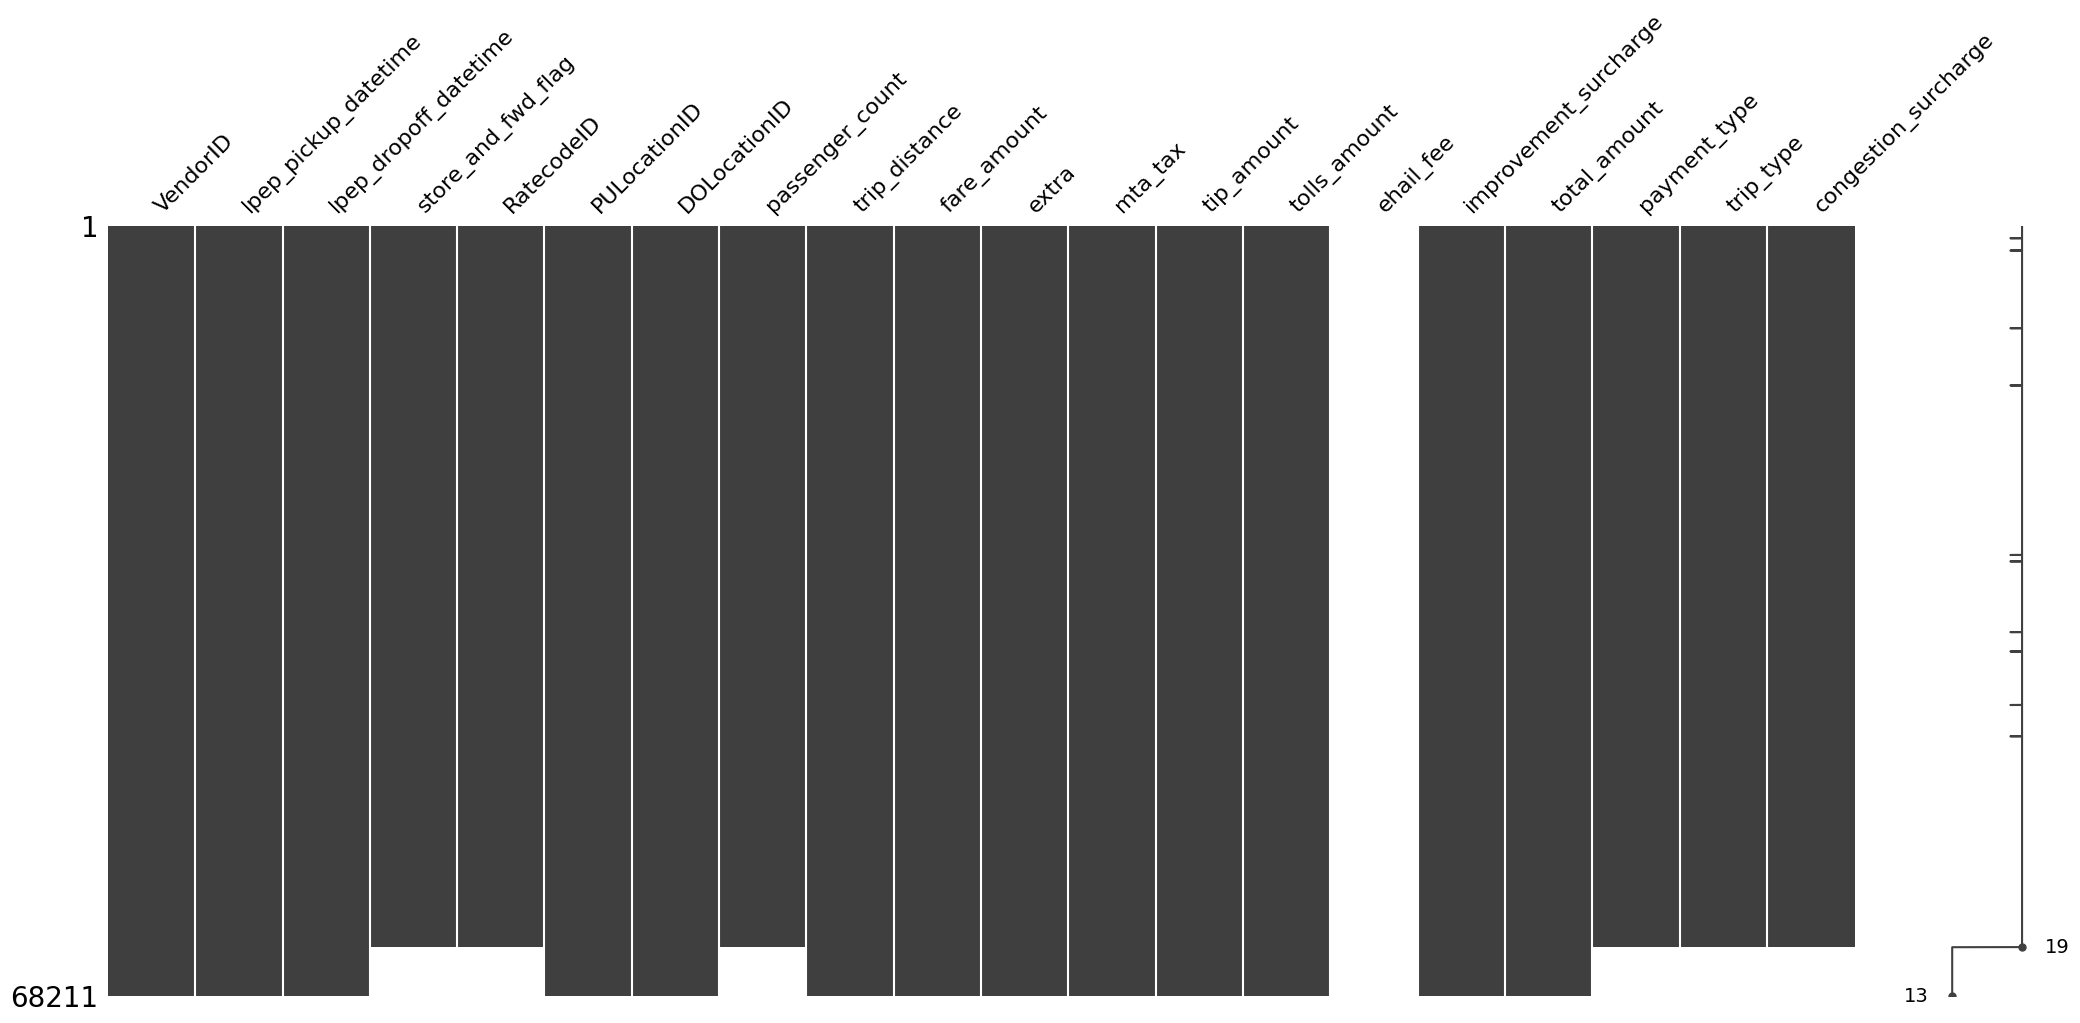

In [10]:
# Memvisualisasikan Missing Value
msno.matrix(df)

In [11]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

- Saat dilakukan identifikasi misisng value, terdapat jumlah missing value yang sama dari kolom "store_and_fwd_flag", "RatecodeID", "passenger_count", "payment_type" dan "congestion_surcharge". kolom-kolom tersebut memiliki jumlah missing value yaitu 4324. Namun ada juga kolom "trip_type" yang memiliki jumlah missing value yang cukup mirip dan hanya selisih 10 data yaitu 4334.

- Kolom-kolom ini kosong kemungkinan terjadi karena Kesalahan teknis atau kesalahan sistem, dikarenakan missing valuenya berada pada baris yang sama, kemungkinan diakibatkan karena masalah koneksi internet sehingga beberapa kolom tidak bisa ter-record.

- Jika dilihat dari matrix missingno, missing value terlihat sejajar dengan kolom lainnya, namun kita akan mencoba untuk memastikan lagi apakah kolom-dengan nilai missing value yang sama tersebut juga menyebabkan missing value di kolom lain, maka akan kita cek dengan cara menghapus salah satu kolom yang memiliki jumlah missing value 4324.

In [12]:
# Mendrop salah satu kolom yang memiliki missing value 4324
df = df.dropna(subset="store_and_fwd_flag")

In [13]:
# Menampilkan missing value
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                63887
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                   10
congestion_surcharge         0
dtype: int64

- Setelah dilakukan drop, ternyata kolom2 tersebut memiliki keterkaitan missing value disuatu kolom dengan kolom lainnya, termasuk kolom "trip_type". 
- Jika dilihat dari jumlah Missing valuenya yaitu 4324 atau sekitar 6,3% dan memiliki 5 kolom lainnya yang kosong, maka kita bisa drop dengan alasan proporsi data hanya 6,3% dan terlalu banyak kolom yang kosong sehingga tidak bisa dilakukan analisis pada 4324 baris ini.
- Setelah 4324 baris missing values di drop, pada kolom "trip_type" masih terdapat 10 missing value, untuk mengidentifikasinya,kita coba untuk menampilkan datanya.

In [14]:
# Menampilkan 10 missing value pada kolom "trip_type"
df[df['trip_type'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0


- Setelah di identifikasi, terdapat data yang tidak normal pada kolom RatecodeID yakni valuenya 99 semua, padahal menurut dokumentasi tidak ada kategori 99 pada kolom RatecodeID.
- Menurut dokumentasi, juga terdapat 6 kategori, yakni:
- 1 = Standard rate
- 2 = JFK
- 3 = Newark
- 4 = Nassau or Westchester
- 5 = Negotiated fare
- 6 = Group ride

-  Dari penjelasan diatas, maka kita perlu identifikasi juga kolom RatecodeID yang memiliki nilai 99.

In [15]:
# Melihat value unik dalam kolom "RatecodeID"
df['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99.])

Setelah dilakukan identifikasi, kolom RatecodeID memiliki 6 value unique yaitu (1,2,3,4,5,99). Secara jumlah unique nya sudah sesuai dengan dokumentasinya yaitu 6 kategori, namun terdapat kategori 99 yang tidak seperti di dokumentasi, maka kita akan tampilkan datanya.

In [16]:
# Melihat kolom "RatecodeID" yang memiliki kategori 99
df[df['RatecodeID']==99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0



Jika dilihat, sisa 10 missing value di kolom "trip_type" SAMA PERSIS dengan kolom "RatecodeID" yang memiliki kategori 99. 

Dari identifikasi diatas, data tersebut memiliki 6 kategori yang sama, hanya saja kategori 6 tidak ada, tetapi malah muncul kategori 99. maka kita bisa mengasumsikan bahwa kategori 99 pada data ini adalah kategori 6, langsung saja kita lakukan replace. 

Setelah melakukan replace pada kategori 6, kita akan mengisi 10 data kosong di kolom "trip_type" dengan nilai modus (mengisi missing value dengan modus dikarenakan kolom ini bertipe kategorik)


In [17]:
# Melakukan replace 99 ke 6 pada kolom "RatecodeID"
df["RatecodeID"].replace(99, 6, inplace=True)
# Melakukan replace NaN ke 1 pada kolom "trip_type"
df["trip_type"].replace(np.nan, 1, inplace=True)

In [18]:
# Cek data unik di "RatecodeID"
df["RatecodeID"].unique()

array([1., 5., 4., 3., 2., 6.])

In [19]:
# Melihat jumlah nilai kosong
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                63887
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

- Semua data sudah bersih dan hanya terdapat kolom "ehail_fee" yang memiliki mising value.
- Melakukan drop kolom "ehail_fee" karena 100% datanya kosong dan tidak memiliki keterkaitan dengan kolom lainnya.

In [20]:
df.dropna(axis=1, inplace=True)

In [21]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [22]:
# Hasil akhir setelah handling missing value
df.shape

(63887, 19)

### Handling Outlier

In [23]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [24]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63887.000000,63887,63887,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000
mean,1.855761,2023-01-16 20:28:42.729444096,2023-01-16 20:46:42.708766976,1.102603,97.735330,138.305978,1.315870,2.577649,16.075929,0.880336,0.627088,2.041188,0.144160,0.949195,21.201826,1.373613,1.021929,0.726748
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:14:43.500000,2023-01-09 12:32:20,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:42,2023-01-17 08:59:14,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:17:56,2023-01-24 16:35:37.500000,1.000000,119.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,6.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351335,NaN,NaN,0.623457,60.177468,76.881043,0.979054,6.760707,13.277321,1.292807,0.367053,2.998608,1.012662,0.201767,15.130916,0.508039,0.146454,1.212836


Setelah dilakukan describe, terlihat bahwa terdapat beberapa data yang terlihat tidak normal:
- lpep_pickup_datetime = memiliki data ditahun 2009 dan 2022
- passenger_count = memiliki jumlah passanger 0 sampai 9
- trip_distance = max nya 1571 miles, tentu angka ini termasuk extreme karena Q3 nya hanya 3 miles.
- fare_amount = terdapat angka minus, hal ini tentu tidak masuk akal jika biayanya minus, asumsinya ada 2 : antara diskon/return atau salah input.
- extra = sama seperti fare_amount terdapat angka minus.
- mta_tax  = sama seperti fare_amount terdapat angka minus.
- tip amount = max nya $222, hal ini terlihat seperti ekstrim karena Q3 nya hanya $3, namun tidak menutup kemungkinan jika memang ada yang memberikan tip sebanyak itu, namun hal ini bisa menyebabkan bias jika dilakukan perhitungan mean.
- tolls_amount = 
- total_amount =  max nya 491 miles, tentu angka ini termasuk extreme karena Q3 nya hanya 25 miles.

kolom "lpep_pickup_datetime" jika diurutkan, maka akan terlihat beberapapa anomali: 
- 3 data awal ada di tahun 2009 dan 2022
- 1 data terakhir ada di bulan februari 2023
- Dapat disimpulkan bahwa semua data berada di bulan Januari tahun 2023, maka 4 data diatas akan di drop

Mengidentifikasi anomali pada kolom "lpep_pickup_datetime"

In [25]:
# Mengurutkan kolom "lpep_pickup_datetime" untuk mengetahui outliernya
df[['lpep_pickup_datetime']].sort_values(by="lpep_pickup_datetime")

,lpep_pickup_datetime
17874,2009-01-01 20:21:27
298,2022-12-09 14:10:49
318,2022-12-09 14:55:42
24,2023-01-01 00:01:31
44,2023-01-01 00:04:25
...,...
63844,2023-01-31 23:45:10
63876,2023-01-31 23:53:41
63858,2023-01-31 23:56:16
63872,2023-01-31 23:58:23


In [26]:
# Menghapus 4 data anomali diatas
df = df.drop(index=[17874, 298, 318, 25100 ])

Mengidentifikasi anomali pada kolom "passenger_count"

In [27]:
# melihat value unik di "passenger_count"
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 0., 7., 9., 8.])

In [28]:
# menghitung banyaknya passenger_count

for i in df['passenger_count'].sort_values().unique():
    print(f"Banyaknya Passenger {i} adalah : {len(df[df['passenger_count']==i])}")

Banyaknya Passenger 0.0 adalah : 336
Banyaknya Passenger 1.0 adalah : 54296
Banyaknya Passenger 2.0 adalah : 5095
Banyaknya Passenger 3.0 adalah : 958
Banyaknya Passenger 4.0 adalah : 364
Banyaknya Passenger 5.0 adalah : 1772
Banyaknya Passenger 6.0 adalah : 1054
Banyaknya Passenger 7.0 adalah : 4
Banyaknya Passenger 8.0 adalah : 2
Banyaknya Passenger 9.0 adalah : 2


Mengutip aturan dari NYC TLC :
"The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear."

Menurut aturan dari NYC TLC adalah :
1. maksimal penumpang adalah 4 untuk taxi dengan 4 cabin
2. maksimal penumpang adalah 5 untuk taxi dengan 5 cabin
3. penumpang berusia di bawah 7 tahun diperbolehkan duduk di pangkuan penumpang dewasa yang duduk di belakang.

Maka jumlah penumpang 1 sampai 9 orang adalah masuk akal.

Namun untuk jumlah penumpang 0 kita asumsikan terdapat kesalahan input data karena tidak wajar jika suatu perjalanan taksi tidak memiliki penumpang namun memiliki biaya. Maka bisa kita ubah dengan modus dari "passanger_count" yaitu 1, alasannya adalah karena "passenger" merupakan data ordinal.

In [29]:
# Mereplace value 0 menjadi 1
df["passenger_count"].replace(0, 1, inplace=True)

In [30]:
# menghitung banyaknya passenger_count
for i in df['passenger_count'].sort_values().unique():
    print(f"Banyaknya Passenger {i} adalah : {len(df[df['passenger_count']==i])}")

Banyaknya Passenger 1.0 adalah : 54632
Banyaknya Passenger 2.0 adalah : 5095
Banyaknya Passenger 3.0 adalah : 958
Banyaknya Passenger 4.0 adalah : 364
Banyaknya Passenger 5.0 adalah : 1772
Banyaknya Passenger 6.0 adalah : 1054
Banyaknya Passenger 7.0 adalah : 4
Banyaknya Passenger 8.0 adalah : 2
Banyaknya Passenger 9.0 adalah : 2


Mengidentifikasi Outlier pada kolom "trip_distance"

In [31]:
display(df.sort_values(by='trip_distance',ascending=False).head(),\
        df.sort_values(by='trip_distance',ascending=True).head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,0.0,0.0,0.00,0.00,1.0,18.75,2.0,1.0,2.75
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,0.0,0.5,0.00,0.00,1.0,206.80,2.0,1.0,0.00
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,0.0,0.0,0.00,0.00,1.0,3.76,2.0,1.0,2.75
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,0.0,0.0,0.10,0.00,1.0,141.10,1.0,2.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
19790,2,2023-01-11 09:52:01,2023-01-11 10:02:14,N,1.0,154,76,1.0,0.0,7.5,0.0,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.00
34587,2,2023-01-18 12:23:09,2023-01-18 13:05:22,N,1.0,179,238,1.0,0.0,32.4,0.0,0.5,9.16,0.0,1.0,45.81,1.0,1.0,2.75
4160,1,2023-01-03 17:53:24,2023-01-03 17:56:12,N,1.0,188,188,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.0,1.0,0.00
34588,2,2023-01-18 12:45:09,2023-01-18 12:45:14,N,5.0,131,264,1.0,0.0,15.0,0.0,0.0,0.01,0.0,1.0,16.01,1.0,2.0,0.00
57403,2,2023-01-28 17:57:48,2023-01-28 18:06:22,N,1.0,95,95,2.0,0.0,8.6,0.0,0.5,0.00,0.0,1.0,10.10,2.0,1.0,0.00


- Dapat dilihat bahwa pada "trip_distance" yang bernilai 1571.97 miles hanya ditempuh dalam wkatu 24 menit, tentu hal ini tidak masuk akal, maka bisa kita drop baris ini.

In [32]:
df = df.drop(df[df['trip_distance'] == 1571.97].index)

- pada kolom "trip_distance" terdapat beberapa data yang bernilai 0 miles, hal ini tentu tidak wajar jika suatu perjalanan memiliki distance 0. maka kita bisa drop baris yang memiliki nilai miles 0.

In [33]:
df = df.drop(df[df['trip_distance'] == 0].index)

Mengidentifikasi Outlier pada kolom "fare_amount", "extra", "mta_tax", "improvement_surcharge", dan "total_amount"

In [34]:
df[df["fare_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0
2481,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,2,2023-01-30 15:57:52,2023-01-30 16:00:00,N,1.0,41,41,1.0,0.37,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,4.0,1.0,0.0
61102,2,2023-01-30 17:17:09,2023-01-30 17:33:27,N,1.0,260,82,1.0,0.67,-14.2,-2.5,-0.5,0.0,0.0,-1.0,-18.2,3.0,1.0,0.0
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0


In [35]:
df[df["fare_amount"]<0]['payment_type'].unique()

array([3., 4.])

- Setelah diidentifikasi, 5 kolom tersebut jika salah satunya negatif maka lainnya juga akan bernilai negatif.
- lalu jika diperhatikan juga, metode pembayaran dari semua baris yang memiliki nilai minus ini adalah 3 dan 4.
- Menurut dokumentasi 3 = No charge dan 4 = Dispute. Untuk lebih jelasnya mari kita lihat data dengan metode pembayaran 3 dan 4.


In [36]:
df[df['payment_type'].isin([3, 4])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,1.0,1.5,0.0,0.0,1.0,5.5,3.0,1.0,0.0
198,1,2023-01-01 03:06:11,2023-01-01 03:06:41,N,5.0,101,101,1.0,1.30,90.0,0.0,0.0,0.0,0.0,0.0,90.0,3.0,2.0,0.0
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,3.0,2.5,0.5,0.0,0.0,1.0,7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,3.0,2.5,0.5,0.0,0.0,1.0,7.0,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0


In [37]:
df[df["payment_type"] == 3]['fare_amount'].unique()

array([  3. ,  90. ,  -3. ,  -8.6,   8.6,  24. ,  -3.7,   3.7,  22.6,
        26.1,   2.5, -10. ,  10. ,  18.4,   6.5,  -4.4,   4.4,  -7.2,
         7.2,   7.5,  -6.5,  -4. ,   4. ,  -5.8,   5.8,  14.2,   5.1,
        10.7,   7. , -13. ,  13. ,  11.4,  -5.1, -70. ,  70. ,  10.5,
        14.9,  -7.9,   7.9,  12.1,  13.5,   9.3,  26.8,  12.8,  77.2,
         3.5, -20. ,  20. ,   5.5, -12. ,  12. ,  17. ,  12.5,  11. ,
        35.9,  15. ,  17.7,  19.1,   8. ,  28.2,   0. ,  20.5, -15. ,
        18.5,  11.5, -14.2,  31.5])

In [38]:
df[df["payment_type"] == 4]['fare_amount'].unique()

array([-4.5,  4.5, -4.4,  4.4, -6.5,  6.5, -3. ,  3. , -9.3,  9.3,  7.9,
       13.5, 12.8,  2.5, 33.1, -5.8,  5.8, -3.7,  3.7, 14.9, 26.8, 17. ,
       15.6,  7.2,  0. , 12.1, 16.3, 19.1, 22.6])

- Jika dilihat data yang menggunakan metode pemayaran 3 dan 4 yang memiliki nilai minus terdapat pola yang sama, yaitu setelah angka minus, tepat dibawahnya adalah angka positif dengan nominal yang sama dan dengan waktu pickup dan dropoff yang sama persis.
- Maka dari identifikasi ini bisa disimpulkan bahwa nilai minus tersebut adalah hasil return atau cancel dari pelanggan. Maka angka minus tidak perlu dihapus karena jika dihapus akan mempengaruhi perhitungan mengenai "fare_amount", "extra", "mta_tax", "improvement_surcharge", serta "total_amount".

Menghandling outlier pada kolom "tip_amount"

In [39]:
df['tip_amount'].describe()

count    60685.000000
mean         2.099500
std          2.953484
min          0.000000
25%          0.000000
50%          1.600000
75%          3.280000
max        222.220000
Name: tip_amount, dtype: float64

Dari data diatas terlihat bahwa nilai maksimal adalah 222.22, sedangkan nilai Q3 nya hanya 3.2900, maka kita cek urutan datanya dari belakang

In [40]:
df['tip_amount'].sort_values().tail(10)

56276     58.88
24979     61.00
19464     72.00
20685     72.55
42831     77.88
31679     79.00
16464     80.00
40892     80.00
38664     80.88
50588    222.22
Name: tip_amount, dtype: float64

Terlihat bahwa hanya terdapat 1 data yang tidak wajar yaitu 222.22, data ini bisa kita drop saja karena tidak masuk akal.

In [41]:
df = df.drop(df[df['tip_amount'] == 222.22].index)

### Adding New Column

In [42]:
df.sort_values(by="fare_amount").tail(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.5,0.0,0.5,0.0,0.0,1.0,260.0,2.0,1.0,0.0
50437,2,2023-01-25 17:24:38,2023-01-25 19:16:52,N,4.0,82,265,5.0,46.29,292.1,2.5,0.5,0.0,0.0,1.0,296.1,2.0,1.0,0.0
556,2,2023-01-01 13:07:46,2023-01-01 19:45:18,N,1.0,223,8,1.0,16.00,292.8,0.0,0.5,0.0,0.0,1.0,294.3,2.0,1.0,0.0
25518,2,2023-01-13 16:51:53,2023-01-13 18:37:48,N,4.0,265,92,2.0,38.24,322.2,2.5,0.0,0.0,21.3,1.0,347.0,2.0,1.0,0.0
44927,2,2023-01-23 10:28:05,2023-01-23 11:33:51,N,4.0,95,265,1.0,47.25,322.9,0.0,0.5,0.0,0.0,1.0,324.4,2.0,1.0,0.0
7731,2,2023-01-05 12:12:49,2023-01-05 19:53:49,N,1.0,223,223,1.0,25.48,348.1,0.0,0.5,0.0,0.0,1.0,349.6,2.0,1.0,0.0
61656,2,2023-01-30 22:13:19,2023-01-30 22:13:32,N,5.0,82,82,1.0,0.02,399.0,0.0,0.0,0.0,0.0,1.0,400.0,2.0,2.0,0.0
50526,2,2023-01-25 17:14:16,2023-01-25 17:21:43,N,5.0,80,37,1.0,0.60,425.0,0.0,0.0,0.0,0.0,1.0,426.0,2.0,2.0,0.0
18474,2,2023-01-10 15:58:15,2023-01-10 15:58:26,N,5.0,92,92,1.0,0.38,440.0,0.0,0.0,0.0,0.0,1.0,441.0,2.0,2.0,0.0
59442,2,2023-01-29 20:01:58,2023-01-29 20:05:25,N,5.0,92,92,1.0,0.07,455.0,0.0,0.0,0.0,0.0,1.0,456.0,2.0,2.0,0.0


- Kita akan membuat kolom baru yaitu "day", "date" dan "hour" yang valuenya berisi ekstrak dari datetime

In [43]:
# Membuat kolom baru dengan value hasil ekstrak dari kolom "lpep_pickup_datetime"
df['day_name'] = df['lpep_pickup_datetime'].dt.day_name()
df['day'] = df['lpep_pickup_datetime'].dt.day
df['hour'] = df['lpep_pickup_datetime'].dt.hour

- Lalu membuat kolom "duration" yang menunjukkan durasi sebuah perjalanan dari hasil perhitungan "lpep_dropoff_datetime" dikurangi "lpep_pickup_datetime" dalam satuan menit dan membulatkannya kebawah dengan tujuan agar mudah untuk dikelompokkan.

In [44]:
# membuat kolom "duration"
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() // 60
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_name,day,hour,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,1,0,11.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,1,0,6.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,1,0,5.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,1,0,5.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Sunday,1,0,17.0


- Karena bertambah kolom baru, maka kita akan melihat pada kolom baru apakah terdapat outlier.

In [45]:
print(f"Jumlah durasi perjalanan yang lebih dari 180 menit : {df[df['duration'] > 180]['duration'].count()}")
print(f"Jumlah durasi perjalanan yang kurang dari 1 menit : {df[df['duration'] < 1]['duration'].count()}")

Jumlah durasi perjalanan yang lebih dari 180 menit : 254
Jumlah durasi perjalanan yang kurang dari 1 menit : 540


- Setelah dilakukan identifikasi ternyata terdapat perjalanan dengan durasi dibawah 1 menit, tentu hal ini tidak masuk akal.
- Terdapat juga durasi perjalanan yang diatas 3 jam, hal ini juga terlihat tidak wajar karena perjalanan taksi tidak diperuntukkan untuk perjalanan yang sangat jauh.
- Melihat jumlah data yang tidak terlalu banyak, maka data-data tersebut bisa kita drop.

In [46]:
# Melakukan drop pada durasi perjalanan yang lebih dari 180 menit dan yang kurang dari 1 menit
df = df[df['duration'] <= 180]
df = df[df['duration'] > 0]

Menambahkan Kolom ZoneID dengan cara merge dari dataset lain

In [47]:
df_zone = pd.read_csv("taxi+_zone_lookup.csv")
df_zone = df_zone.drop(columns=["service_zone", "Zone"])
df_zone.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [48]:
df = df.merge(df_zone, left_on='PULocationID', right_on='LocationID', how='inner')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_name,day,hour,duration,LocationID,Borough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Sunday,1,0,11.0,166,Manhattan
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,N,1.0,166,244,1.0,2.48,16.3,...,22.56,1.0,1.0,0.00,Sunday,1,0,14.0,166,Manhattan
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,N,1.0,166,250,5.0,9.01,37.3,...,39.80,2.0,1.0,0.00,Sunday,1,0,20.0,166,Manhattan
3,1,2023-01-01 01:45:19,2023-01-01 01:47:57,N,1.0,166,166,1.0,0.60,4.0,...,6.00,2.0,1.0,0.00,Sunday,1,1,2.0,166,Manhattan
4,2,2023-01-01 01:34:07,2023-01-01 01:52:34,N,1.0,166,229,2.0,5.13,25.4,...,38.31,1.0,1.0,2.75,Sunday,1,1,18.0,166,Manhattan


## Data Analysis

1. Menganalisis bagaimana trend perjalanan dibulan Januari 2023
2. Menganalisis rentang waktu apa suatu perjalanan ramai dan di waktu apa perjalan sepi?
3. Apa penyebab di waktu itu ramai dan kenapa diwaktu yang lain sepi?
4. Menganalisis perilaku pelanggan berdasarkan perjalanan taksi di New York.
5. Menganalisis Solusi untuk masalah yang ada
6. Menyimpulkan Analisis dan memberikan rekomendasi berdasarkan analisis.

### 1. Menganalisis bagaimana trend perjalanan dibulan Januari 2023

Menganalisis Trend jumlah perjalanan bertujuan untuk mengetahui apakah terjadi pola atau kecenderungan naik/turun.

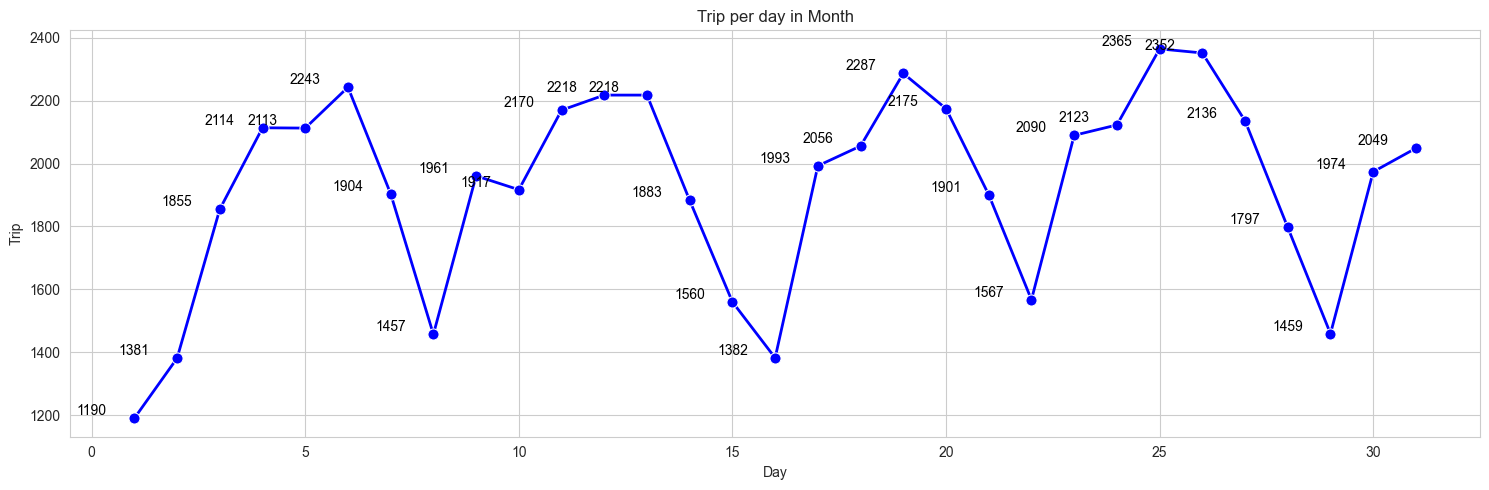

In [79]:
# Mengelompokkan Tanggal dan menghitung jumlahnya
date_count = df.groupby('day')['day'].count().reset_index(name='count')

# Membuat grafik jumlah transaksi per tanggal
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.lineplot(x='day', y='count', data=date_count, marker='o', markersize=8, linewidth=2, color='blue')

for i, count in enumerate(date_count['count']):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Trip per day in Month")
plt.xlabel("Day")
plt.ylabel("Trip")
plt.tight_layout()
plt.show()


Interpretasi
- Data ini memiliki tren mingguan, di mana jumlah transaksi taksi selalu meningkat pada hari senin dan kemudian mengalami penurunan pada hari sabtu dan minggu.
- Tanggal 25 memiliki jumlah transaksi tertinggi, masing dengan 2,366 transaksi.
- Tanggal 1 memiliki jumlah transaksi terendah, yaitu 1,190. Hal ini mungkin disebabkan karena bertepatan dengan hari libur tahun baru dan juga bertepatan dengan hari minggu.

### 2. Menganalisis rentang waktu apa suatu perjalanan ramai dan di waktu apa perjalan sepi?

Untuk mengetahui lebih jelasnya lagi, mari kita coba tampilkan data di setiap harinya

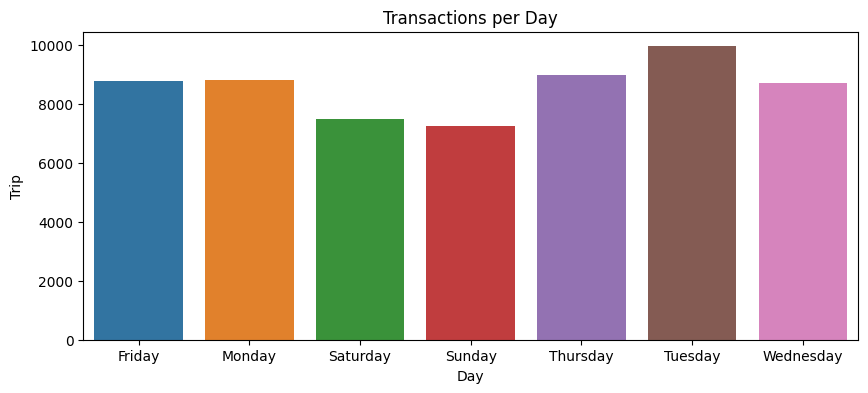

In [50]:
# Mengelompokkan hari dan menghitung jumlahnya
day_count = df.groupby('day_name')['day_name'].count().reset_index(name='count')

# Membuat grafik jumlah transaksi per hari
plt.figure(figsize=(10,4))
sns.barplot(x='day_name', y='count', data=day_count, hue="day_name")
plt.title("Transactions per Day")
plt.xlabel("Day")
plt.ylabel("Trip")
plt.show()

Interpretasi:
- Hari dengan Jumlah transaksi tertinggi adalah "Tuesday" dengan 9,937 transaksi.
- Hari dengan Jumlah transaksi terendah adalah "Sunday" dengan 7,233 tansaksi.
- Hari "Tuesday" adalah hari yang paling sibuk dalam data ini, sementara "Sunday" adalah yang paling sepi.

Setelah mengetahui datanya dari setiap harinya,  maka kita coba tampilkan data di setiap jamnya

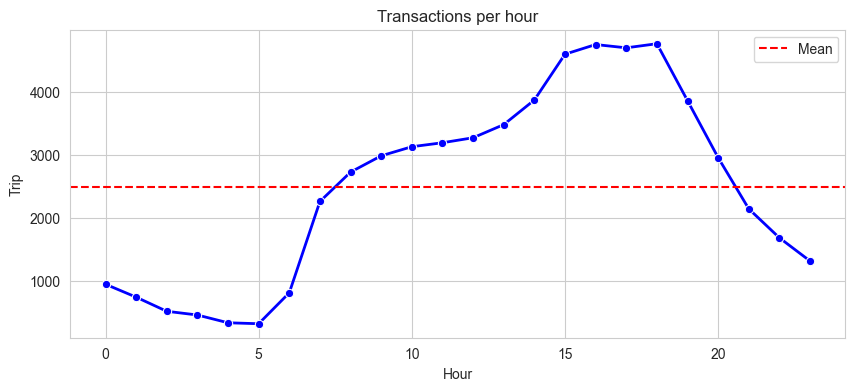

In [81]:
# Mengelompokkan Jam dan menghitung jumlahnya
hour_count = df.groupby('hour')['hour'].count().reset_index(name='count')

# Membuat line plot jumlah trip per Jam
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.lineplot(x='hour', y='count', data=hour_count, marker="o", markersize=6, color='b', linewidth=2)
plt.title("Transactions per hour")
plt.xlabel("Hour")
plt.ylabel("Trip")
plt.axhline(hour_count['count'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()


Interpretasi:
- Jumlah transaksi taksi cenderung rendah pada tengah malam hingga pagi awal (jam 0-5) dengan transaksi terendah pada jam 5 pagi dengan total transaksi sebanyak 328. lalu mulai meningkat di jam 6 pagi hinngga jam 8 pagi. 
- Jam-jam sibuk terjadi pada jam 8 pagi hingga puncaknya jam 8 malam dengan transaksi diatas rata-rata yaitu lebih dari 2,500 dan puncaknya terjadi pada jam 18 dengan 4763 transaksi. Ini menunjukkan bahwa sebagian besar transaksi taksi terjadi selama jam berangkat kerja dan jam pulang kerja.

Untuk memvisualisasikan secara menyeluruh dan mengetahui hubungannya, maka kita visualisasikan dengan heatmap

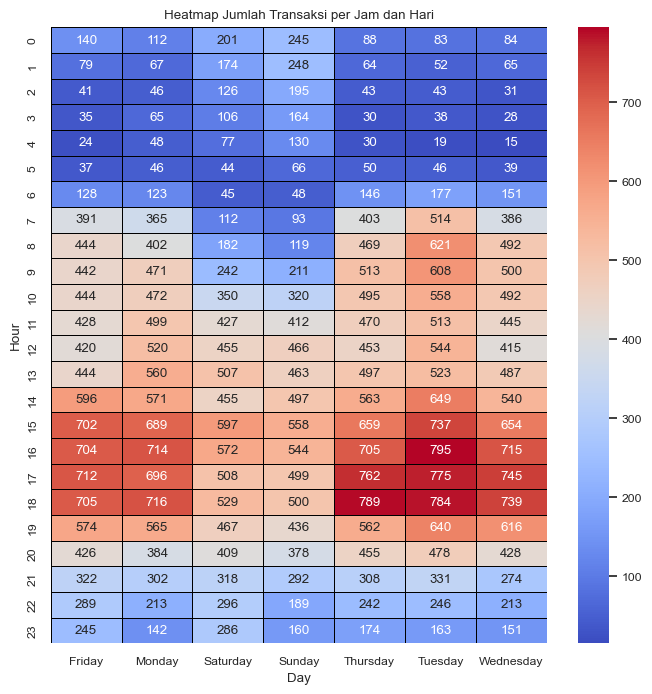

In [86]:
# Membuat heatmap dengan peta warna yang menarik
heatmap_data = df.groupby(['hour', 'day_name']).size().unstack()

plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.set_style("whitegrid")

# Menggunakan peta warna 'coolwarm' yang menarik
ax = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Heatmap Jumlah Transaksi per Jam dan Hari')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()


Kesimpulan dari awal Analisis adalah:
1. Rentang waktu yang menunjukkan banyak jumlah perjalanan adalah di waktu weekdays, perjalanan taksi mulai meningkat sat hari senin hingga puncaknya di hari rabu dan kamis.
2. Rentang waktu yang menunjukkan sepi terdapat pada weekend, dapat dilihat bahwa setelah hari jumat selalu mengalami penurunan yang sangat drastis dan meningkat lagi di hari senin.
3. Rentang jam paling ramai berkisar di jam 8 pagi sampai di jam 8 malam dengan total perjalanan diatas rata-ratanya yaitu 2500 perjalanan

### 3. Apa penyebab di waktu itu ramai dan kenapa diwaktu yang lain sepi?

- Jika Dilihat dari waktunya, dapat kita asumsikan bahwa para pelanggan taksi sebagian besar adalah para pegawai. Untuk membuktikan asumsi ini bisa kita cek dari : <br>
1. trip berdasarkan wilayahnya
2. trip berdasarkan jumlah penumpang
3. trip berdasarkan durasi perjalanannya.
4. trip berdasarkan jarak perjalanannya.

1. Membuat barplot untuk mengetahui jumlah trip berdasarkan wilayahnya

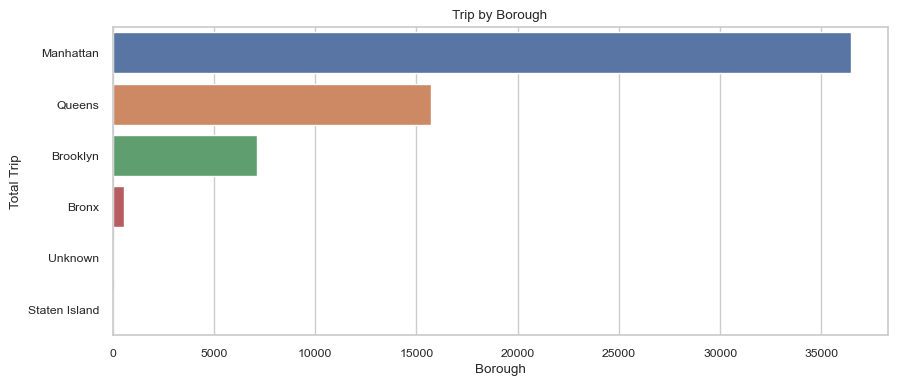

Banyaknya Trip di wilayah Bronx adalah : 544 (0.91%)
Banyaknya Trip di wilayah Brooklyn adalah : 7123 (11.89%)
Banyaknya Trip di wilayah Manhattan adalah : 36440 (60.84%)
Banyaknya Trip di wilayah Queens adalah : 15738 (26.28%)
Banyaknya Trip di wilayah Staten Island adalah : 8 (0.01%)
Banyaknya Trip di wilayah Unknown adalah : 37 (0.06%)


In [92]:
# Mengelompokkan Borough dan mengihtung jumlahnya
borough_count = df.groupby(by="Borough")['Borough'].count().reset_index(name="count").sort_values(by='count', ascending=False)

# Membuat grafik jumlah transaksi per kelompok durasi
plt.figure(figsize=(10,4))
sns.barplot(data=borough_count, x='count', y='Borough', hue="Borough" )
plt.title("Trip by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Trip")
plt.show()

# Menunjukkan Presentase Data
for i in df['Borough'].sort_values().unique():
    count = len(df[df['Borough'] == i])
    percentage = (count / len(df)) * 100
    print(f"Banyaknya Trip di wilayah {i} adalah : {count} ({percentage:.2f}%)")


2. trip berdasarkan jumlah penumpang

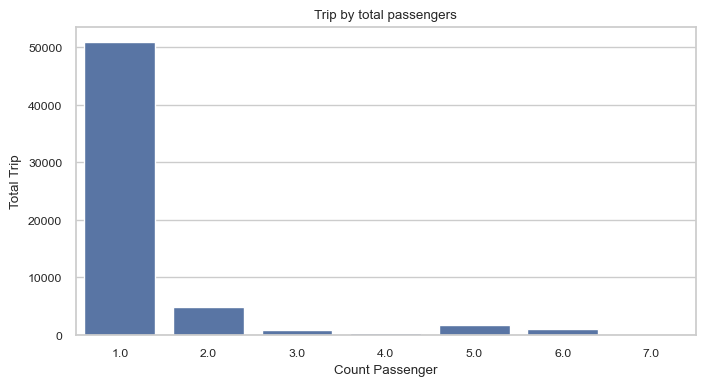

Banyaknya Passenger 1.0 adalah : 51039 (85.22%)
Banyaknya Passenger 5.0 adalah : 1741 (2.91%)
Banyaknya Passenger 2.0 adalah : 4839 (8.08%)
Banyaknya Passenger 3.0 adalah : 890 (1.49%)
Banyaknya Passenger 4.0 adalah : 356 (0.59%)
Banyaknya Passenger 6.0 adalah : 1023 (1.71%)
Banyaknya Passenger 7.0 adalah : 2 (0.00%)


In [90]:
# Mengelompokkan Borough dan mengihtung jumlahnya
count_passenger = df.groupby(by="passenger_count")['passenger_count'].count().reset_index(name="count")

# Membuat grafik jumlah transaksi per kelompok durasi
plt.figure(figsize=(8,4))
sns.barplot(data=count_passenger, x='passenger_count', y='count')
plt.title("Trip by total passengers")
plt.xlabel("Count Passenger")
plt.ylabel("Total Trip")
plt.show()

# Menunjukkan Presentase Data
for i in df['passenger_count'].unique():
    count = len(df[df['passenger_count'] == i])
    percentage = (count / len(df)) * 100
    print(f"Banyaknya Passenger {i} adalah : {count} ({percentage:.2f}%)")

3. trip berdasarkan durasi perjalanannya.

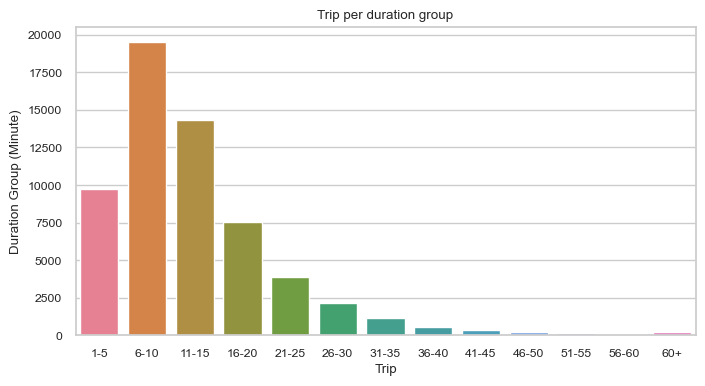

Banyaknya duration group 6-10 menit adalah : 19527 (32.6%)
Banyaknya duration group 11-15 menit adalah : 14300 (23.88%)
Banyaknya duration group 1-5 menit adalah : 9735 (16.25%)
Banyaknya duration group 16-20 menit adalah : 7514 (12.55%)
Banyaknya duration group 21-25 menit adalah : 3874 (6.47%)
Banyaknya duration group 26-30 menit adalah : 2168 (3.62%)
Banyaknya duration group 31-35 menit adalah : 1155 (1.93%)
Banyaknya duration group 36-40 menit adalah : 560 (0.94%)
Banyaknya duration group 41-45 menit adalah : 350 (0.58%)
Banyaknya duration group 46-50 menit adalah : 233 (0.39%)
Banyaknya duration group 60+ menit adalah : 226 (0.38%)
Banyaknya duration group 51-55 menit adalah : 144 (0.24%)
Banyaknya duration group 56-60 menit adalah : 104 (0.17%)


In [89]:
# Membuat kelompok durasi
bins = [0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 172.0]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '60+']
df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels)
duration_group = df['duration_group'].value_counts().reset_index(name="count")
duration_group.columns = ['duration_group', 'trip']


# Membuat grafik jumlah transaksi per kelompok durasi
plt.figure(figsize=(8,4))
sns.barplot(data=duration_group, x='duration_group', y='trip', hue='duration_group')
plt.title("Trip per duration group")
plt.xlabel("Trip")
plt.ylabel("Duration Group (Minute)")
plt.show()

# Menunjukkan Presentase Data
for index, row in duration_group.iterrows():
    persen = row['trip'] / sum(duration_group['trip']) * 100
    persen = round(persen, 2)  # Membulatkan nilai persentase menjadi dua angka desimal
    print(f"Banyaknya duration group {row['duration_group']} menit adalah : {row['trip']} ({persen}%)")

3. trip berdasarkan jarak perjalanannya.

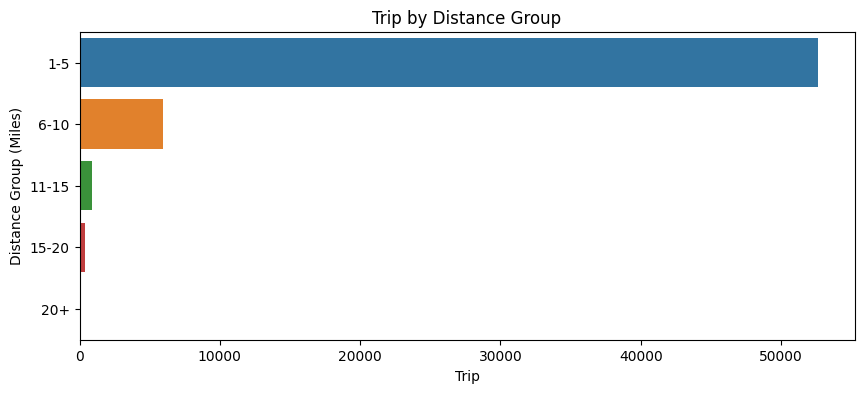

Banyaknya Distance group 1-5 miles adalah : 52611 (87.85%)
Banyaknya Distance group 6-10 miles adalah : 5946 (9.93%)
Banyaknya Distance group 11-15 miles adalah : 868 (1.45%)
Banyaknya Distance group 15-20 miles adalah : 365 (0.61%)
Banyaknya Distance group 20+ miles adalah : 100 (0.17%)


In [56]:
# Mengelompokkan Distance berdasarkan tripnya
bins = [0,  5, 10, 15, 20, 57.09]
labels = ['1-5', '6-10', '11-15', '15-20', '20+']
df['distance_group'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)
distance_group = df['distance_group'].value_counts().reset_index(name="count")
distance_group.columns = ['distance_group', 'trip_distance']


# Membuat grafik jumlah trip per kelompok distance
plt.figure(figsize=(10,4))
sns.barplot(data=distance_group, x="trip_distance", y="distance_group", hue='distance_group')
plt.title("Trip by Distance Group")
plt.xlabel("Trip")
plt.ylabel("Distance Group (Miles)")
plt.show()

distance_group
# Menunjukkan Presentase Data
for index, row in distance_group.iterrows():
    persen = row['trip_distance'] / sum(distance_group['trip_distance']) * 100
    persen = round(persen, 2)  # Membulatkan nilai persentase menjadi dua angka desimal
    print(f"Banyaknya Distance group {row['distance_group']} miles adalah : {row['trip_distance']} ({persen}%)")


In [57]:
# Menghitung Rata2 Jumlah perjalanan saat weekend
df_weekend = df[(df['day_name'] == 'Saturday') | (df['day_name'] == 'Sunday')]
print(f"Rata-rata jumlah perjalanan saat weekend adalah {len(df_weekend)/2}") 

# Menghitung Rata2 Jumlah perjalanan saat weekdays
df_weekday = df[~((df['day_name'] == 'Saturday') | (df['day_name'] == 'Sunday'))]
print(f"Rata-rata jumlah perjalanan saat weekday adalah {len(df_weekday)/5}")
print(f"Selisih jumlah perjalanan saat weekend dan weekday adalah {len(df_weekday)/5 - len(df_weekend)/2} atau 18,5 persen")

Rata-rata jumlah perjalanan saat weekend adalah 7359.0
Rata-rata jumlah perjalanan saat weekday adalah 9034.4
Selisih jumlah perjalanan saat weekend dan weekday adalah 1675.3999999999996 atau 18,5 persen


INTERPRETASI:<br>

- Dari 4 analisis diatas dapat kita rangkum bahwa:
1. Wilayah dengan jumlah perjalanan terbaynk adalah Manhattan dengan jumlah perjalanan 36440 (60.84%), Hal ini mengindikasikan bahwa sebagian besar Warga New York melakukan perjalanan di wilayah Manhattan yang mana merupakan wilayah perkantoran.
2. Jumlah penumpang 1 orang mendominasi seluruh perjalanan yaitu dengan jumlah 51039 perjalanan atau 85.22%.
3. Data durasi perjalanan menunjukkan kelompok durasi paling banyak adalah 6-10 menit yang terjadi sebanyak 19527 atau 32.6%, durasi perjalanan 11-15 adalah : 14300 menit (23.88%) dan duration group 1-5 adalah : 9735 (16.25%). Hal ini menunjukkan bahwa perjalanan didominasi oleh perjalanan pendek (dibawah 15 menit).
4. Banyaknya Distance group 1-5 miles adalah : 52611 perjalanan atau (87.85%) Hal ini menunjukkan bahwa sebagian besar penumpang taksi melakukan perjalanan dengan perjalanan pendek.
5. Rata-rata jumlah perjalanan saat weekend adalah 7359.0 sedangkan saat weekday adalah 9034.4.Dapat dilihat bahwa saat weekend terdapat selisih rata-rata jumlah perjalanan per harinya, yaitu sebesar 1675 atau 18,5 persen.

- Maka kesimpulannya adalah:
- Menurut wilayah yang paling ramai adalah Manhattan yang merupakan wilayah perkantoran, jumlah penumpangnya 1 orang, durasi perjalanan dibawah 15 menit dan jarak perjalanannya pendek maka sebagian besar pengguna taksi di New York City adalah `para pekerja`
- Dapat sisimpulkan bahwa Waktu ramai disebabkan oleh para pekerja menggunakan taksi untuk bernagkat kerja dan waktu sepi disebabkan oleh para pekerja sedang libur atau tidak bekerja
- PROBLEM : Terdapat selisih jumlah perjalanan yang cukup tinggi yaitu sekitar 18,5% pada saat weekend dibandingkan weekday. Lalu bagaimana cara untuk menstabilkannya?

### 5. Menganalisis Solusi untuk masalah yang ada

Analisis ini dilakukan untuk menemukan solusi bagaimana caranya untuk menaikkan jumlah perjalanan dengan menganalisis perjalanan di masing-masing wilayah dan dilihat berdasarkan wilayahnya

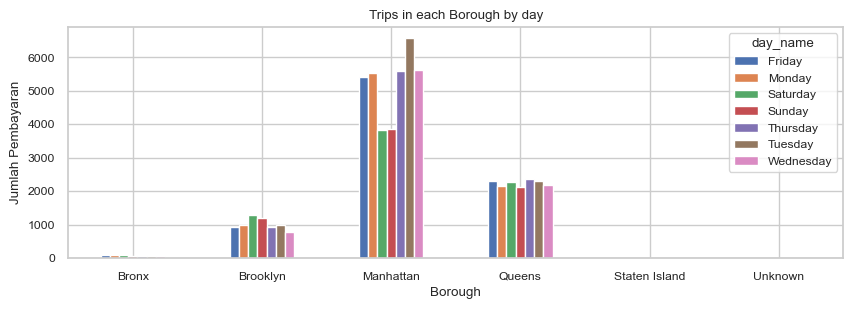

In [96]:
# Mengelompokkan Wilayah dan hari dan menghitung jumlah perjalanannya
count_day_per_borough = df.groupby(['Borough', 'day_name']).size().unstack()

# Membuat barplot
count_day_per_borough.plot(kind='bar', figsize=(10, 3))
plt.xlabel('Borough')
plt.ylabel('Jumlah Pembayaran')
plt.xticks(rotation=0)
plt.title('Trips in each Borough by day')
plt.legend(title='day_name')
plt.show()

- Dapat dilihat jika dikelompokkan antara wilayah dan hari, dapat diketahui bahwa wilayah Manhattan saat weekend terjadi penurunan yang cukup signifikan saat weekend.
- Namun terdapat wilayah Brooklyn dengan jumlah perjalanan saat weekend justru lebih tinggi dibandingkan saat weekdays 
- Bisa diasumsikan bahwa orang-orang di Brooklyn saat weekend lebih banyak menggunakan taksi untuk liburan

In [59]:
duration_in_borough = df[df['Borough']== "Brooklyn"][['duration_group']].value_counts().reset_index()
duration_in_borough.head()
for index, row in duration_in_borough.iterrows():
    persen = row['count'] / sum(duration_in_borough['count']) * 100
    persen = round(persen, 2)
    print(f"Banyaknya kelompok durasi {row['duration_group']} menit adalah : {row['duration_group']} ({persen}%)")

Banyaknya kelompok durasi 6-10 menit adalah : 6-10 (23.18%)
Banyaknya kelompok durasi 11-15 menit adalah : 11-15 (22.72%)
Banyaknya kelompok durasi 16-20 menit adalah : 16-20 (17.07%)
Banyaknya kelompok durasi 21-25 menit adalah : 21-25 (11.4%)
Banyaknya kelompok durasi 1-5 menit adalah : 1-5 (9.1%)
Banyaknya kelompok durasi 26-30 menit adalah : 26-30 (7.19%)
Banyaknya kelompok durasi 31-35 menit adalah : 31-35 (3.9%)
Banyaknya kelompok durasi 36-40 menit adalah : 36-40 (1.84%)
Banyaknya kelompok durasi 41-45 menit adalah : 41-45 (1.01%)
Banyaknya kelompok durasi 60+ menit adalah : 60+ (0.94%)
Banyaknya kelompok durasi 46-50 menit adalah : 46-50 (0.87%)
Banyaknya kelompok durasi 51-55 menit adalah : 51-55 (0.42%)
Banyaknya kelompok durasi 56-60 menit adalah : 56-60 (0.37%)


- Jika dilihat dari kelompok durasi perjalanan di Wilayah Brooklyn, durasinya cenderung sedang-lama dengan 6-25 menit dengan total presentasenya 74,37%.

INTERPRETASI:
- Jika dilihat dari hari dan wilayah, Brooklyn cenderung ramai pada saat weekend, berbeda dengan Manhattan yang ramai saat weekdays.
- Jika dilihat dari durasinya juga didominasi oleh kelompok durasi sedang-lama. 
- Dapat diasumsikan bahwa Pelanggan di Brooklyn adalah `non-pekerja` karena lebih sering memesan taksi pada saat weekend dan melakukan perjalanan jarak jauh.

Menganalisis Jumlah Pembayaran dan Jumlah Tip di tiap Wilayah untuk mengetahui sberapa besar orang-orang di wilayahnya mengeluarkan uang untuk perjalanan taksi

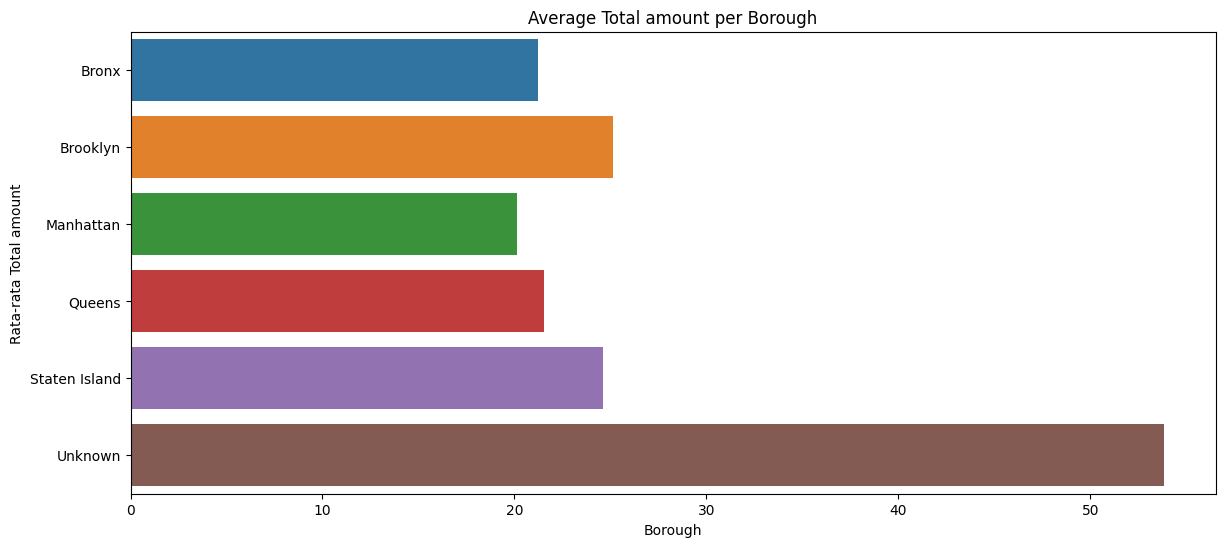

Banyaknya Total amount di wiilayah Bronx adalah : 21.242463235294117
Banyaknya Total amount di wiilayah Brooklyn adalah : 25.116588516074685
Banyaknya Total amount di wiilayah Manhattan adalah : 20.138330680570803
Banyaknya Total amount di wiilayah Queens adalah : 21.531275892743675
Banyaknya Total amount di wiilayah Staten Island adalah : 24.6075
Banyaknya Total amount di wiilayah Unknown adalah : 53.835945945945944


In [60]:
# Rata-rata total amount disetiap wilayah
borough_total_amount_avg = df.groupby('Borough')['total_amount'].mean().reset_index()

# Membuat grafik rata-rata total amount tiap wilayah
plt.figure(figsize=(14, 6))
sns.barplot(data= borough_total_amount_avg, x='total_amount', y='Borough', hue="Borough")
plt.xlabel('Borough')
plt.ylabel('Rata-rata Total amount')
plt.title('Average Total amount per Borough')
plt.show()

# Menunjukkan Jumlah Data
for index, row in borough_total_amount_avg.iterrows():
    print(f"Banyaknya Total amount di wiilayah {row['Borough']} adalah : {row['total_amount']}")

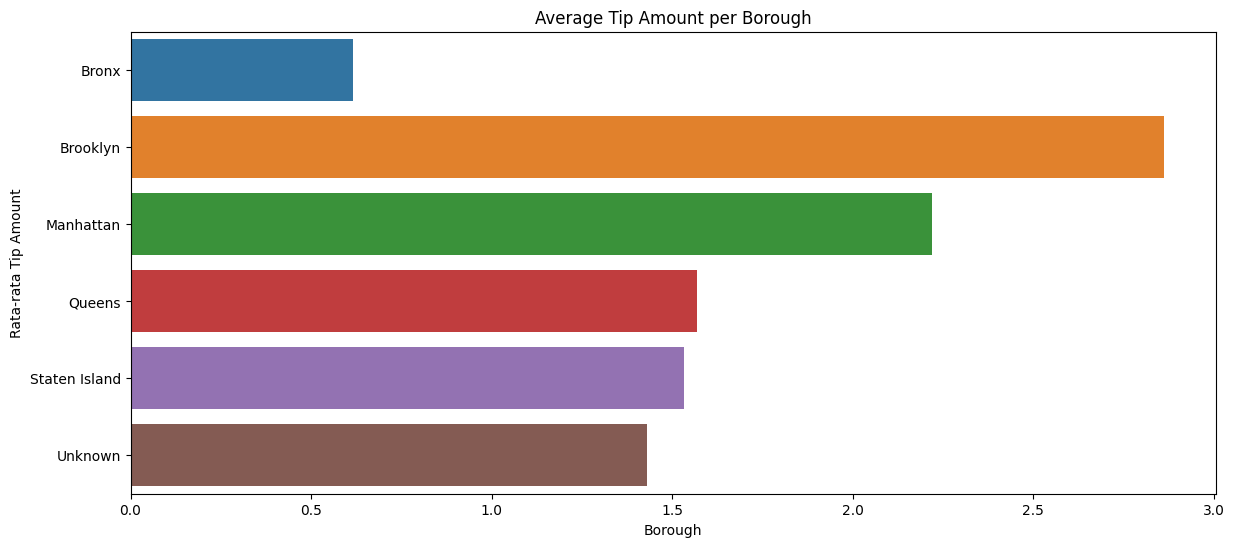

Banyaknya Tip amount di wiilayah Bronx adalah : 0.6152941176470589
Banyaknya Tip amount di wiilayah Brooklyn adalah : 2.8616594131686086
Banyaknya Tip amount di wiilayah Manhattan adalah : 2.2184555433589463
Banyaknya Tip amount di wiilayah Queens adalah : 1.5678987164823992
Banyaknya Tip amount di wiilayah Staten Island adalah : 1.5325
Banyaknya Tip amount di wiilayah Unknown adalah : 1.4305405405405405


In [61]:
# Rata-rata tip amount disetiap wilayah
borough_tip_avg = df.groupby('Borough')['tip_amount'].mean().reset_index()

# Membuat grafik rata-rata tip_amount tiap wilayah
plt.figure(figsize=(14, 6))
sns.barplot(data= borough_tip_avg, x='tip_amount', y='Borough', hue="Borough")
plt.xlabel('Borough')
plt.ylabel('Rata-rata Tip Amount')
plt.title('Average Tip Amount per Borough')
plt.show()

# Menunjukkan Jumlah Data
for index, row in borough_tip_avg.iterrows():
    print(f"Banyaknya Tip amount di wiilayah {row['Borough']} adalah : {row['tip_amount']}")

- Dapat disimpulkan bahwa Wilayah Brooklyn sebenarnya berpotensi untuk dinaikkan jumlah perjalanannya. 
- Hal ini karena dari rata-rata jumlah pembayaran menunjukkan bahwa di Brooklyn adalah $25.1 hal ini lebih tinggi dibanding dari wilayah manapun.
- Dapat dilihat juga dari sisi jumlah tip, Wilayah Brooklyn juga memberi rata-rata tip terbanyak yaitu sebesar $2.86 saat melakukan perjalanan menggunakan taksi.
- Dari analisis ini dapat disimpulkan bahwa Wilayah Brooklyn cenderung lebih banyak mengeluarkan uang untuk perjalanan taxi, seseorang yang memberikan tips bisa dikatakan juga mereka puas dan senang dengan layanan taksi yang ada, hal ini berpotensi menghasilkan banyak perjalanan.

### KESIMPULAN

`SUMMARY DATA:`

- Data perjalanan taksi di New York City memiliki tren mingguan, di mana jumlah perjalanan taksi selalu meningkat pada hari senin dan kemudian mengalami penurunan pada hari sabtu dan minggu.
- Hari "Tuesday" adalah hari yang paling sibuk dalam data ini, sementara "Sunday" adalah yang paling sepi.
- Jumlah transaksi taksi cenderung rendah pada tengah malam hingga pagi awal (jam 0-5) dengan transaksi terendah pada jam 5 pagi. Jam-jam sibuk terjadi pada jam 8 pagi hingga puncaknya jam 8 malam
- Jika Dilihat dari waktunya, dapat kita asumsikan bahwa para pelanggan taksi sebagian besar adalah para pegawai.

`Hal ini perlu dianalisis lebih dalam dengan melihat pada wilayah, jumlah penumpang, durasi dan jaraknya.`

- Wilayah dengan jumlah perjalanan terbaynk adalah Manhattan dengan jumlah perjalanan 36440 (60.84%) dimana Manhattan merupakan wilayah perkantoran.
- Jumlah penumpang 1 orang mendominasi seluruh perjalanan yaitu dengan jumlah 51039 perjalanan atau 85.22%.
- Data durasi perjalanan menunjukkan kelompok durasi paling banyak adalah 6-10 menit yang terjadi sebanyak 19527 atau 32.6%, durasi perjalanan 11-15 adalah : 14300 menit (23.88%) dan duration group 1-5 adalah : 9735 (16.25%). Hal ini menunjukkan bahwa perjalanan didominasi oleh perjalanan pendek (dibawah 15 menit).
- Banyaknya Distance group 1-5 miles adalah : 52611 perjalanan atau (87.85%) Hal ini menunjukkan bahwa sebagian besar penumpang taksi melakukan perjalanan dengan perjalanan pendek.
- Dapat dilihat bahwa saat weekend dan weekdays terdapat selisih sebesar 1675 perjalanan atau 18,5 persen dari rata-rata jumlah perjalanan per harinya.

`Maka kesimpulannya adalah:`
- Menurut wilayah yang paling ramai adalah Manhattan yang merupakan wilayah perkantoran, jumlah penumpangnya 1 orang, durasi perjalanan dibawah 15 menit dan jarak perjalanannya pendek maka ebagian besar pengguna taksi di New York City adalah `para pekerja`
- Dapat sisimpulkan bahwa Waktu ramai disebabkan oleh para pekerja menggunakan taksi untuk berangkat kerja dan waktu sepi disebabkan oleh para pekerja sedang libur atau tidak bekerja

`MASALAH:`
- Bagaimana cara menambah jumlah perjalanan saat weekend yang cenderung sepi?

`ANALISIS MASALAH:`
- wilayah Brooklyn memiliki jumlah perjalanan saat weekend justru lebih tinggi dibandingkan saat weekdays 
- Bisa diasumsikan bahwa orang-orang di Brooklyn saat weekend lebih banyak menggunakan taksi untuk liburan
- Jika dilihat dari kelompok durasi perjalanan di Wilayah Brooklyn, durasinya cenderung sedang-lama dengan 6-25 menit dengan total presentasenya 74,37%.
- Setelah dianalisis dari segi tip amount dan total amount dapat disimpulkan bahwa Wilayah Brooklyn sebenarnya berpotensi untuk dinaikkan jumlah perjalanannya. 
- Hal ini karena dari rata-rata jumlah pembayaran menunjukkan bahwa di Brooklyn lebih tinggi dalam hal jumlah pembayarannya untuk melakukan perjalanan menggunakan taksi dibanding dari wilayah manapun.
- Dapat dilihat juga dari sisi jumlah tip, Wilayah Brooklyn juga cenderung banyak memberi tip saat melakukan perjalanan menggunakan taksi.
- Dari analisis ini dapat disimpulkan bahwa Wilayah Brooklyn berpotensi menghasilkan banyak perjalanan karena pelanggannya cenderung lebih banyak mengeluarkan uang untuk perjalanan taxi, seseorang yang memberikan tips bisa dikatakan juga mereka puas dan senang dengan layanan taksi yang ada.

`SOLUSI DAN REKOMENDASI:`
- Karena Brooklyn merupakan wilayah yang terletak di sebelah barat daya Manhattan, dan memiliki  taman, dan pantai yang indah serta terkenal dengan seni, musik, dan restoran yang berkembang pesat, maka bisa diberikan promo berupa tiket wisata di area Brooklyn dengan bekerjasama dengan pihak wisata yang akan menghasilkan benefit bagi kedua pihak.
- Tetap menjaga loyalitas pelanggan di wilayah Manhattan agar tetap menggunakan taksi untuk pergi bekerja dengan sistem member yang mungkin hal ini memerlukan kajian lebih lanjut mengenai biaya, aturan dan sistemnya.